In [171]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression



# import data

In [108]:
df = pd.read_excel('premiums.xlsx')
df.head()


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [109]:
df.shape

(50000, 13)

In [110]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    50000 non-null  int64 
 1   gender                 50000 non-null  object
 2   region                 50000 non-null  object
 3   marital_status         50000 non-null  object
 4   number_of_dependants   50000 non-null  int64 
 5   bmi_category           50000 non-null  object
 6   smoking_status         49989 non-null  object
 7   employment_status      49998 non-null  object
 8   income_level           49987 non-null  object
 9   income_lakhs           50000 non-null  int64 
 10  medical_history        50000 non-null  object
 11  insurance_plan         50000 non-null  object
 12  annual_premium_amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


## Handle Na & duplicate values

In [112]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [113]:
df.dropna(inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [114]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [115]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [116]:
df[df.number_of_dependants<0].shape

(72, 13)

In [117]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1])

In [118]:
df.number_of_dependants = abs(df.number_of_dependants)

Finding Outliers 

In [119]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

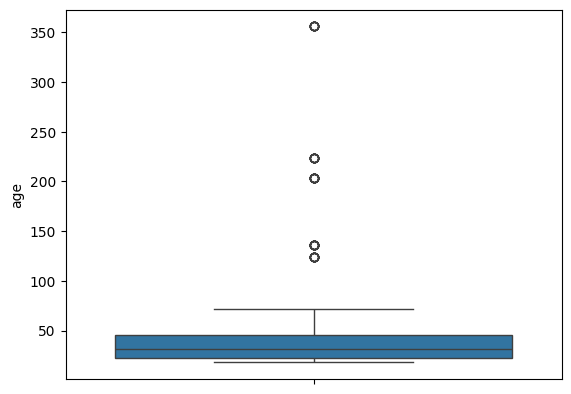

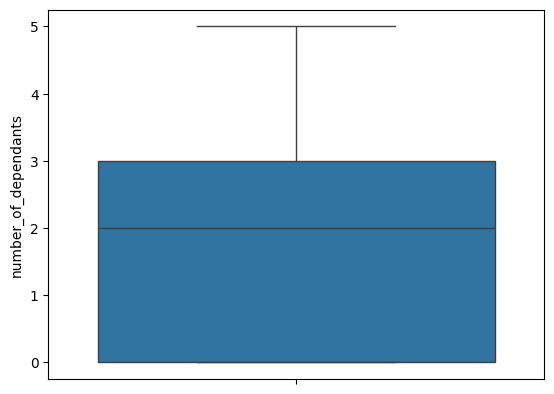

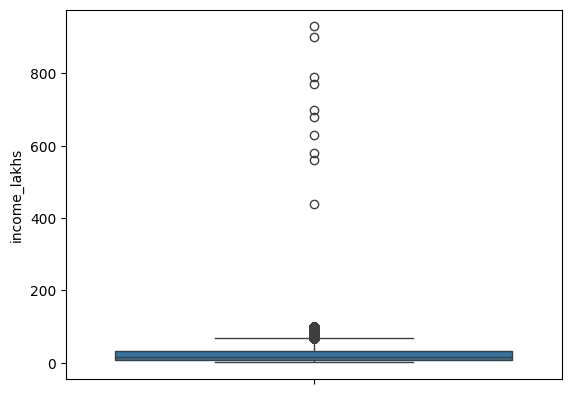

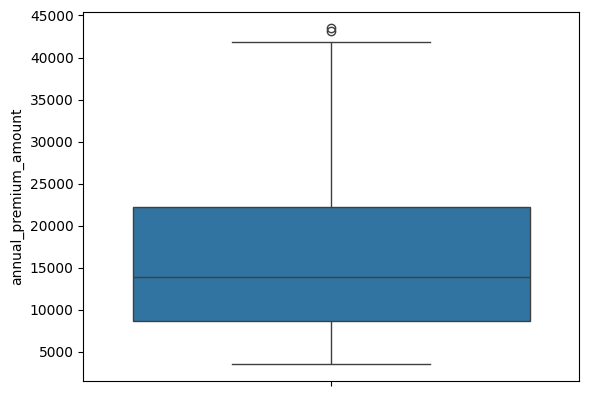

In [120]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 8))  # Creates a 2x2 grid of subplots

for col in numeric_col :
    sns.boxplot(df[col])
    plt.show()



Ouliers in Age Colume

In [121]:
df[df.age>100].age.unique()

array([224, 124, 136, 203, 356])

In [122]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


Ouliers in Income_lakhs column

In [123]:
def get_iqr_bound(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    higher = q3 + 1.5*iqr

    return lower, higher

In [124]:
get_iqr_bound(df.income_lakhs)

(-29.0, 67.0)

In [125]:
quantile_thresold = df.income_lakhs.quantile(0.999)
quantile_thresold

np.float64(100.0)

In [126]:
df1[df1['income_lakhs']>quantile_thresold].shape

(10, 13)

In [127]:
df2 = df1[df1['income_lakhs']<=quantile_thresold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


## Visulaization distubution


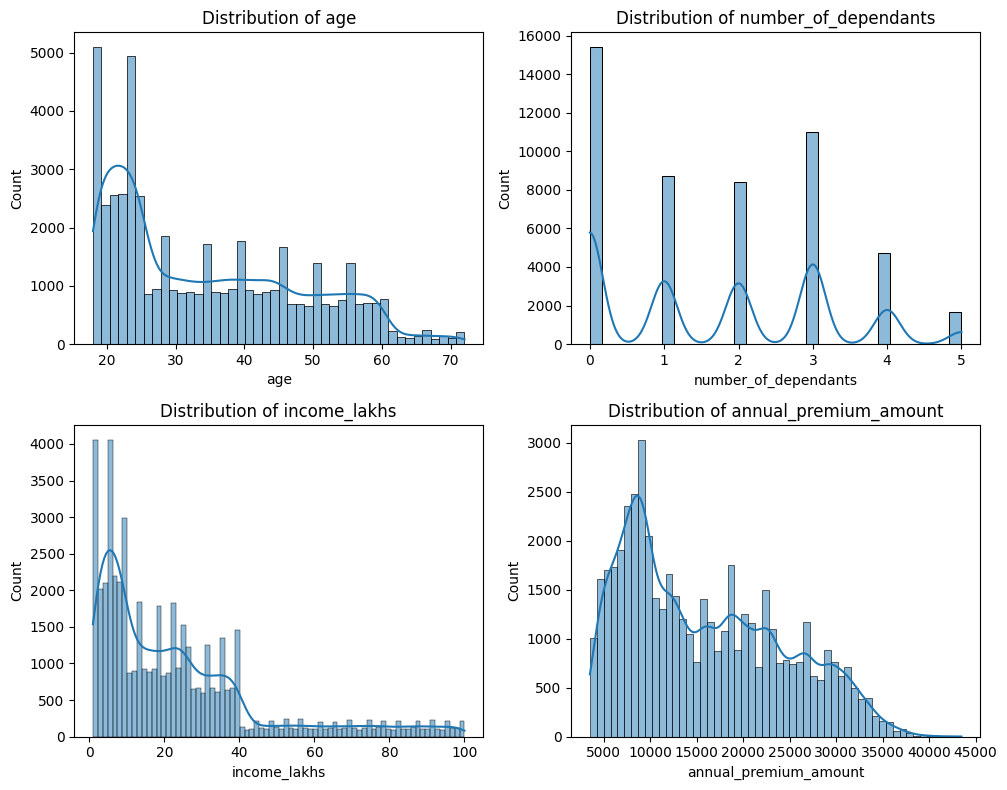

In [128]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Dynamic size based on column count

for i, col in enumerate(numeric_col):
    ax = axes[i//2, i%2]
    sns.histplot(df2[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')  # Adding title for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


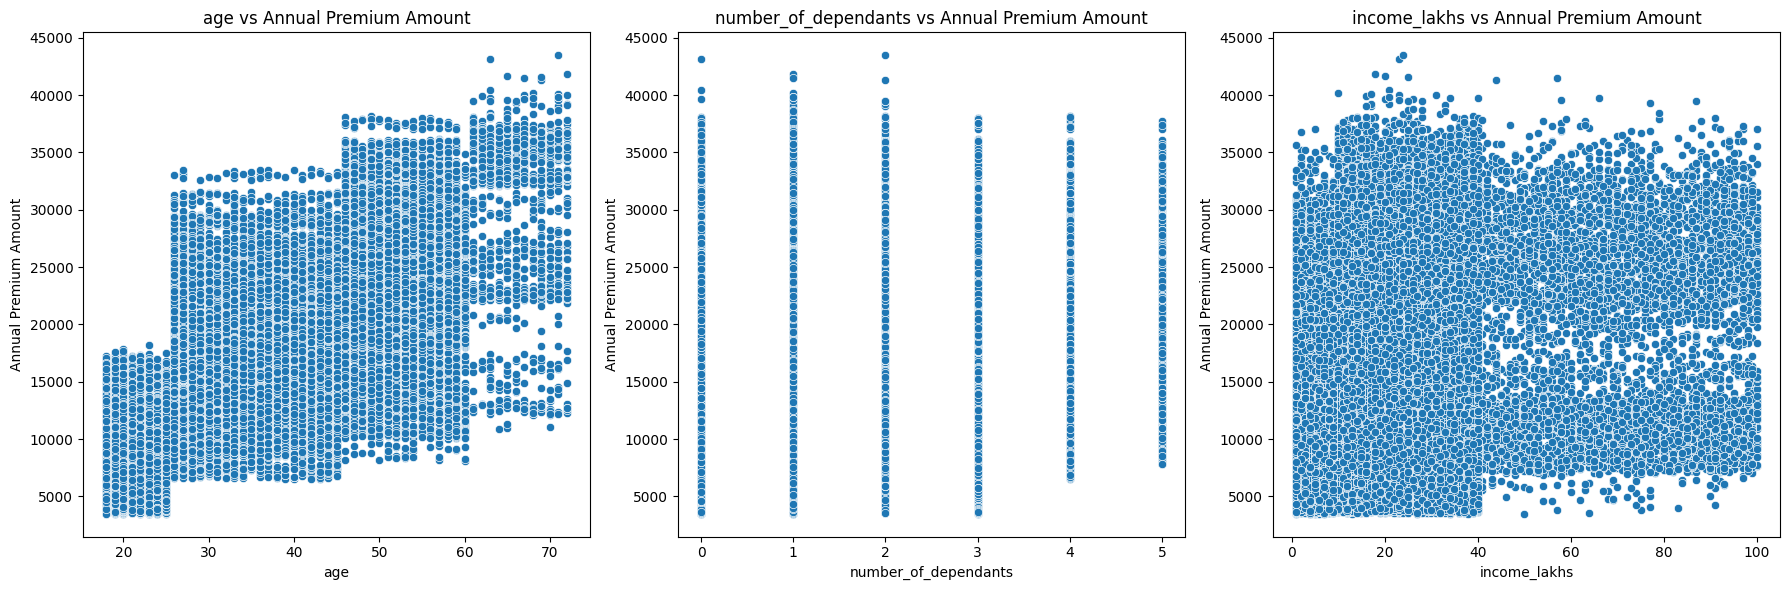

In [129]:
num_feat = ['age', 'number_of_dependants', 'income_lakhs']

fig, axes = plt.subplots(1, len(num_feat), figsize=(18, 6))  # Dynamic size based on column count

for ax, col in zip(axes, num_feat):
    sns.scatterplot(x=df2[col], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{col} vs Annual Premium Amount')
    ax.set_xlabel(col)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show()


In [130]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [131]:
cat_feat = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'medical_history', 'insurance_plan', 'income_level']

for col in cat_feat:
    print(col, ':', df2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']


In [132]:
df2.smoking_status.replace({
    'Smoking=0' : 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking': 'No Smoking'
}, inplace=True)
df2.smoking_status.unique()

C:\Users\chara\AppData\Local\Temp\ipykernel_9584\2529991949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.smoking_status.replace({


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

<Axes: ylabel='proportion'>

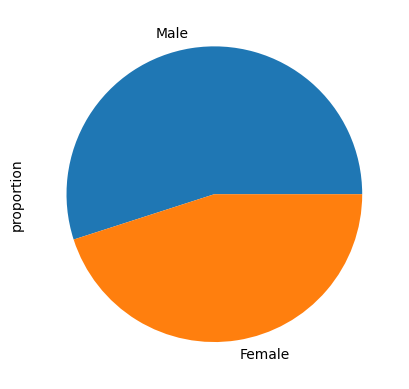

In [133]:
df2.gender.value_counts(normalize=True).plot(kind='pie')

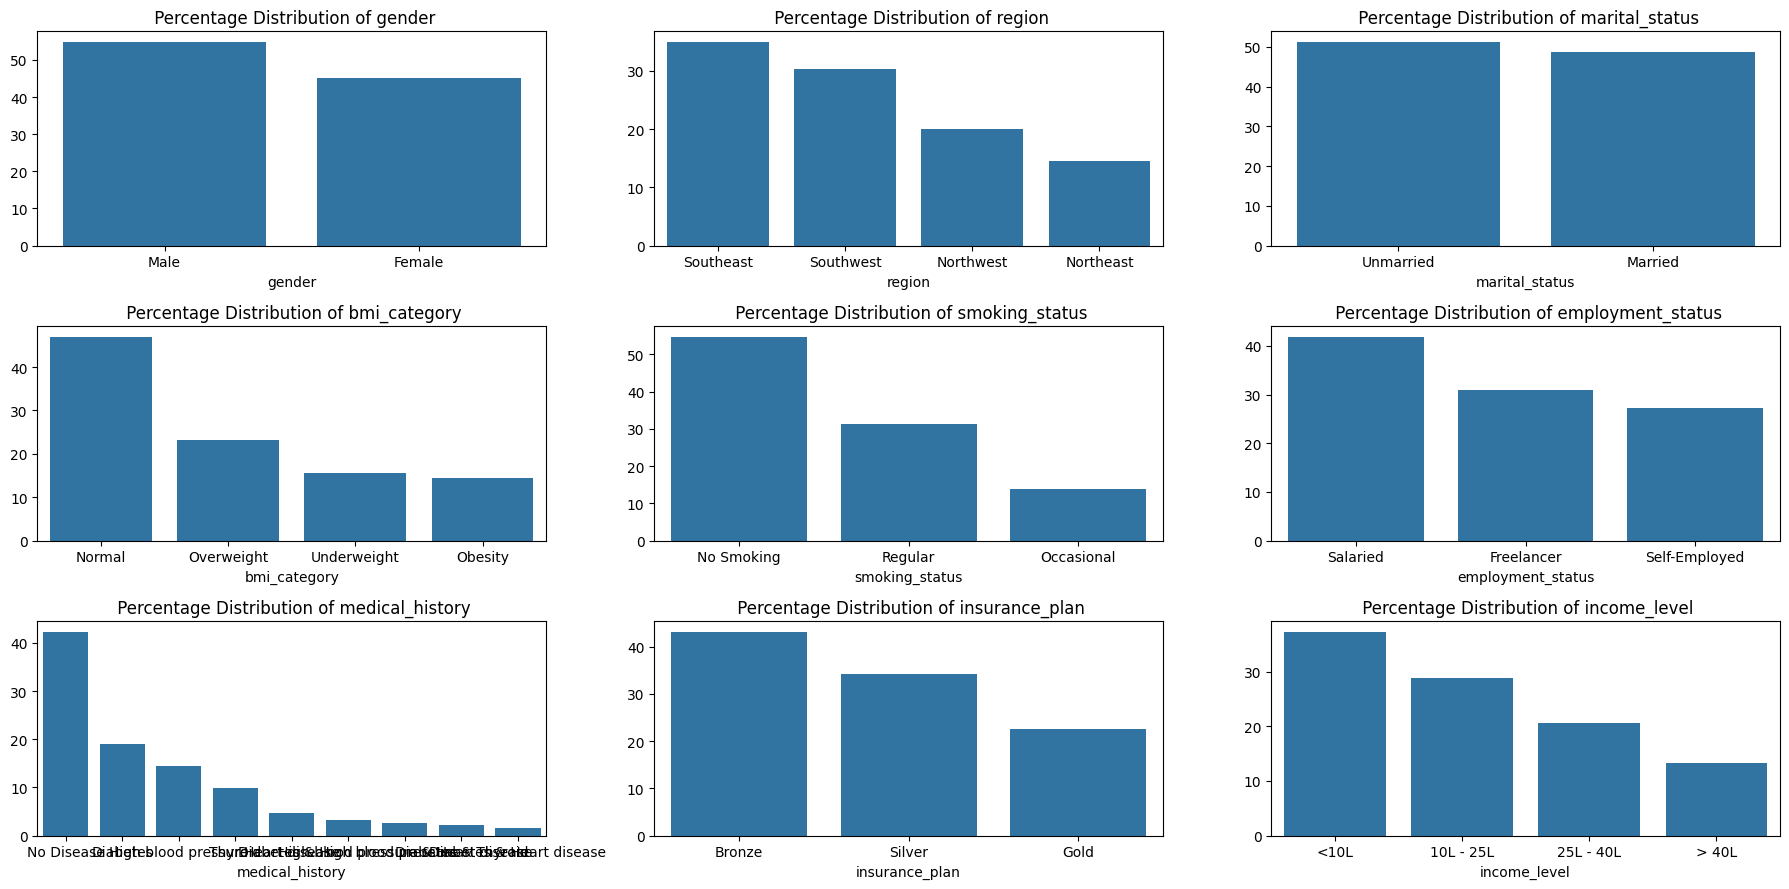

In [134]:
fig, axes = plt.subplots(3, 3, figsize=(18, 9))  # Dynamic size based on column count 
# ax = axes.flatten() 

for ax, col in zip(axes.flatten(), cat_feat): 
    
    pert = df2[col].value_counts(normalize=True)*100 
    sns.barplot(x=pert.index, y=pert.values, ax=ax) 
    ax.set_title(f' Percentage Distribution of {col}')  # Adding title for clarity 
    ax.set_xlabel(col)  

plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show() 

In [135]:
cross_tab = pd.crosstab(df2.income_level, df2.insurance_plan)
cross_tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


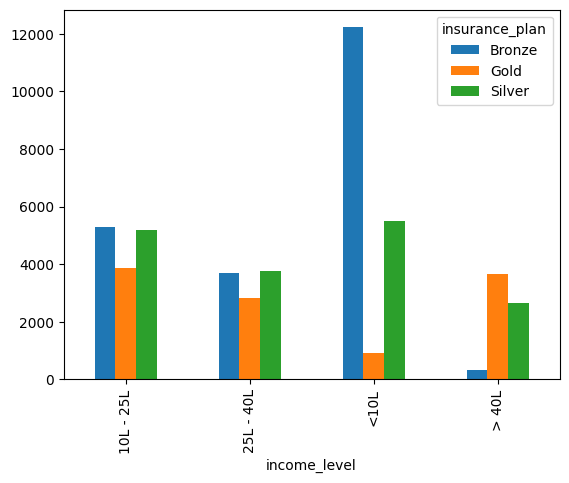

In [136]:
cross_tab.plot(kind='bar')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

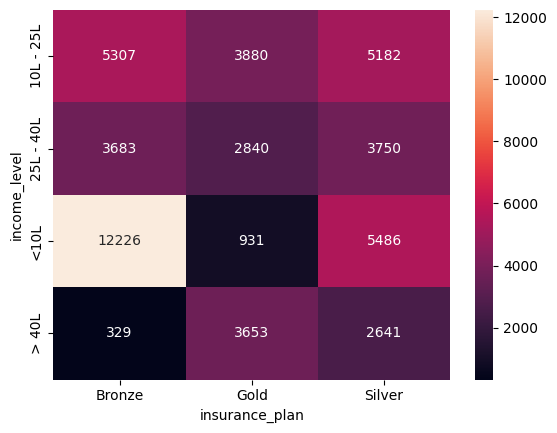

In [137]:
sns.heatmap(cross_tab, annot=True, fmt='d')

# Feature Engineering

In [138]:
# df2.fillna('None', inplace=True)
df.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [139]:
risk_score = {
    'diabetes' : 6,
    'heart disease': 8, 
    'high blood pressure': 6,
    'thyroid' : 5,
    'no disease': 0,
    'none': 0
}


In [140]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
1777,18,Male,Northwest,Unmarried,1,Normal,Regular,Freelancer,10L - 25L,12,No Disease,Gold,16460,no disease,None
39584,56,Male,Southeast,Married,3,Overweight,Regular,Salaried,10L - 25L,10,Diabetes,Gold,31572,diabetes,None
21353,23,Male,Southwest,Unmarried,0,Normal,Regular,Freelancer,<10L,8,No Disease,Bronze,9732,no disease,None
34795,25,Female,Northwest,Married,3,Normal,Regular,Salaried,25L - 40L,31,Diabetes & Heart disease,Silver,10837,diabetes,heart disease
16646,28,Male,Southeast,Married,4,Underweight,Regular,Freelancer,<10L,7,High blood pressure,Bronze,12606,high blood pressure,None


In [141]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')

In [142]:
print(df2['disease1'].unique())
print(df2['disease2'].unique())

['diabetes' 'high blood pressure' 'no disease' 'thyroid' 'heart disease']
['none' 'high blood pressure' 'heart disease' 'thyroid']


In [143]:
df2['total_risk_score'] = 0

df2['total_risk_score'] = df2.apply(lambda x: risk_score.get(x['disease1'], 0) + risk_score.get(x['disease2'], 0), axis=1)

max_sc = df2.total_risk_score.max()
min_sc = df2.total_risk_score.min()
df2['normalized_risk_score'] = (df2.total_risk_score-min_sc)/(max_sc - min_sc)

df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
32656,18,Male,Northwest,Unmarried,2,Overweight,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6044,no disease,none,0,0.000000
8376,26,Male,Northwest,Married,3,Normal,No Smoking,Salaried,10L - 25L,23,Heart disease,Silver,19919,heart disease,none,8,0.571429
21743,44,Female,Northwest,Married,3,Normal,No Smoking,Salaried,<10L,5,Diabetes & Heart disease,Gold,26534,diabetes,heart disease,14,1.000000
21280,54,Male,Southwest,Married,3,Normal,Regular,Self-Employed,10L - 25L,20,Diabetes,Gold,30009,diabetes,none,6,0.428571
37009,34,Male,Southwest,Married,4,Overweight,Occasional,Self-Employed,10L - 25L,11,Thyroid,Gold,25447,thyroid,none,5,0.357143


In [144]:
df2.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
disease1                 0
disease2                 0
total_risk_score         0
normalized_risk_score    0
dtype: int64

In [145]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold': 3})
df2.insurance_plan.unique()

array([1, 2, 3])

In [146]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '> 40L': 3, '25L - 40L': 4})
df2['income_level'].unique()

array([1, 2, 3, 4])

In [147]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
1814,59,Male,Southwest,Married,5,Obesity,No Smoking,Self-Employed,2,22,Diabetes,1,14893,diabetes,none,6,0.428571
48258,59,Female,Southwest,Unmarried,0,Normal,No Smoking,Salaried,4,35,Thyroid,3,26952,thyroid,none,5,0.357143
755,71,Female,Northwest,Married,1,Normal,No Smoking,Self-Employed,4,34,Thyroid,3,33068,thyroid,none,5,0.357143
21886,23,Female,Northeast,Unmarried,1,Normal,No Smoking,Salaried,1,3,No Disease,1,8032,no disease,none,0,0.000000
34952,58,Male,Southwest,Married,3,Overweight,No Smoking,Self-Employed,1,7,Diabetes,2,20766,diabetes,none,6,0.428571


In [148]:
nomial_col = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status' ]

df3 = pd.get_dummies(df2, columns=nomial_col, drop_first=True, dtype=int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,3,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [149]:
df4 = df3.drop(columns=['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,3,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


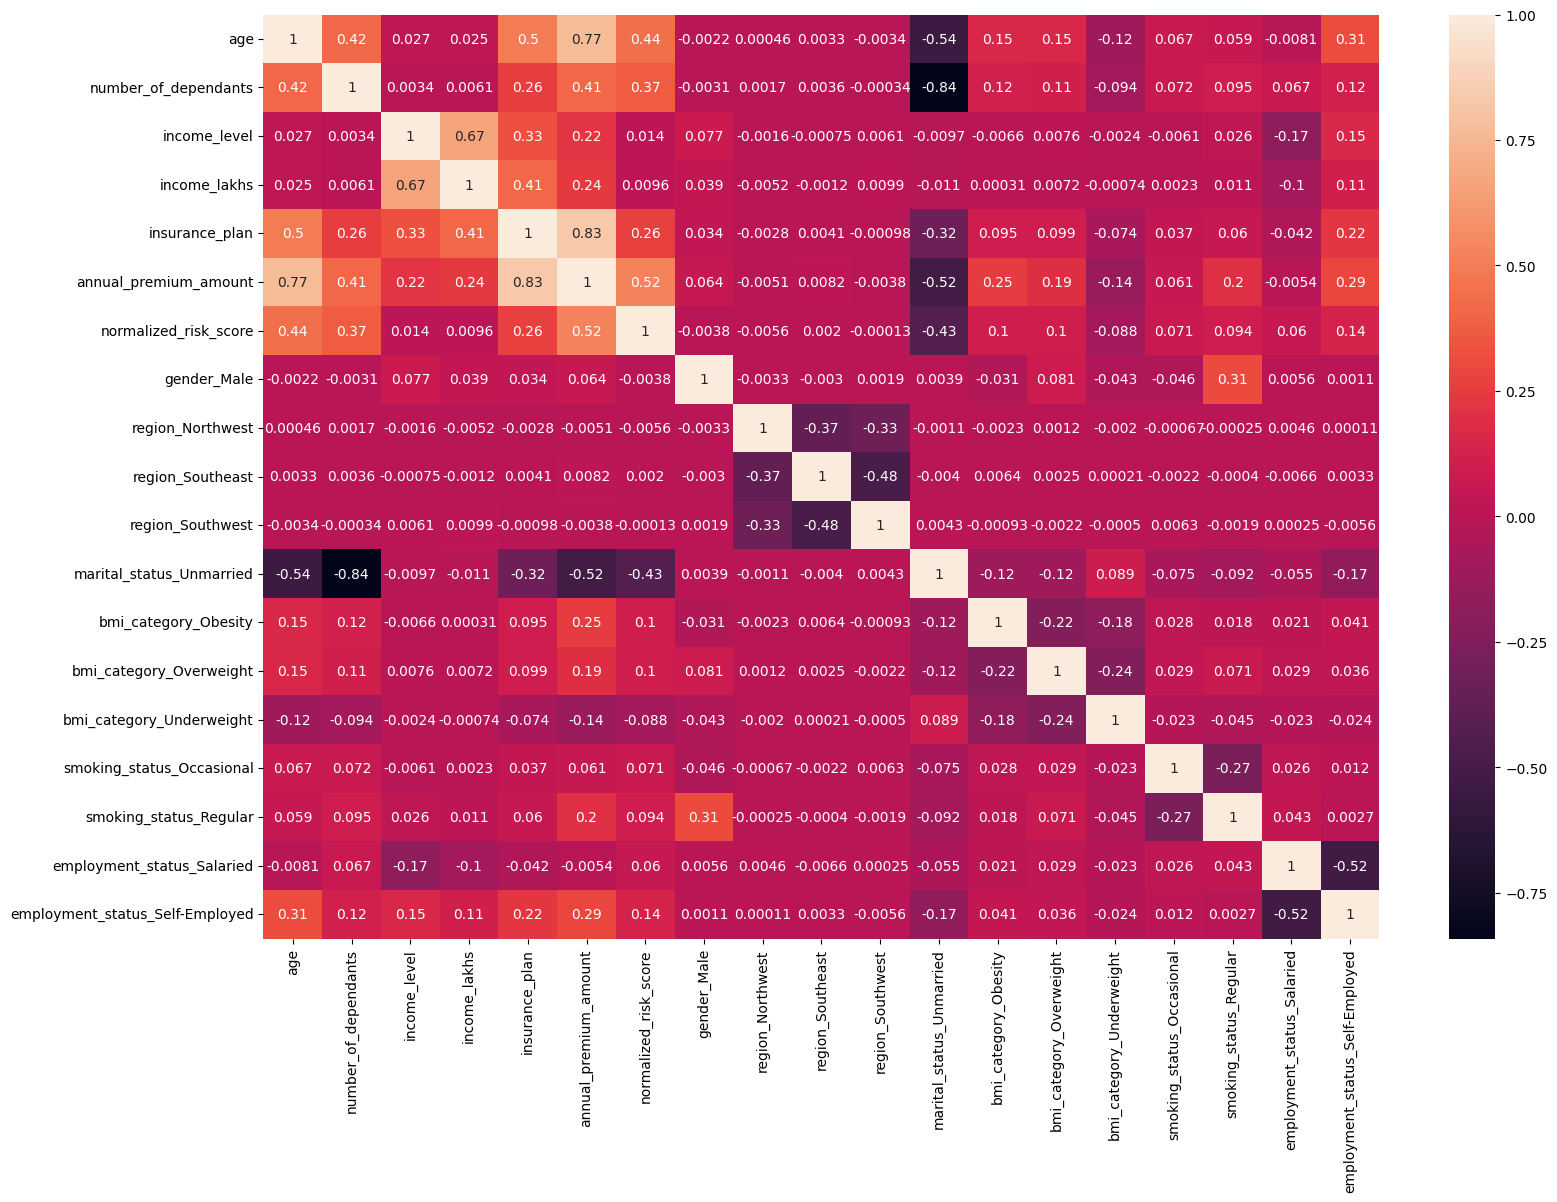

In [150]:
cm = df4.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(cm, annot=True)
plt.show()

MinMaxScaling Cols

In [151]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

X.head()


,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,3,77,3,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,3,99,2,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [152]:
col_scale = ['age', 'number_of_dependants', 'income_lakhs', 'income_level', 'insurance_plan']

scaler = MinMaxScaler()
X[col_scale] = scaler.fit_transform(X[col_scale])

X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.390278,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.380124,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df


In [154]:
vif(X)

,column,vif
0,age,4.546828
1,number_of_dependants,4.552788
2,income_level,3.809392
3,income_lakhs,3.940341
4,insurance_plan,3.470028
5,normalized_risk_score,2.688740
6,gender_Male,2.424683
7,region_Northwest,2.103537
8,region_Southeast,2.923930
9,region_Southwest,2.671921


# Model Training

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [157]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((34935, 18), (14973, 18), (34935,), (14973,))

In [158]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)


0.9287044657640235

In [159]:
train_score = model_lr.score(X_train, y_train)
teat_score = model_lr.score(X_test, y_test)

train_score, teat_score

(0.9287523854422783, 0.9287044657640235)

In [166]:
feature_importance = model_lr.coef_

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['coeff'])
coef_df = coef_df.sort_values(by='coeff', ascending=True)

coef_df

,coeff
income_lakhs,-1247.974283
marital_status_Unmarried,-935.537196
number_of_dependants,-673.875635
region_Northwest,-37.300037
region_Southwest,-26.192910
region_Southeast,40.457895
gender_Male,142.417491
employment_status_Salaried,205.387312
bmi_category_Underweight,392.879704
employment_status_Self-Employed,394.786010


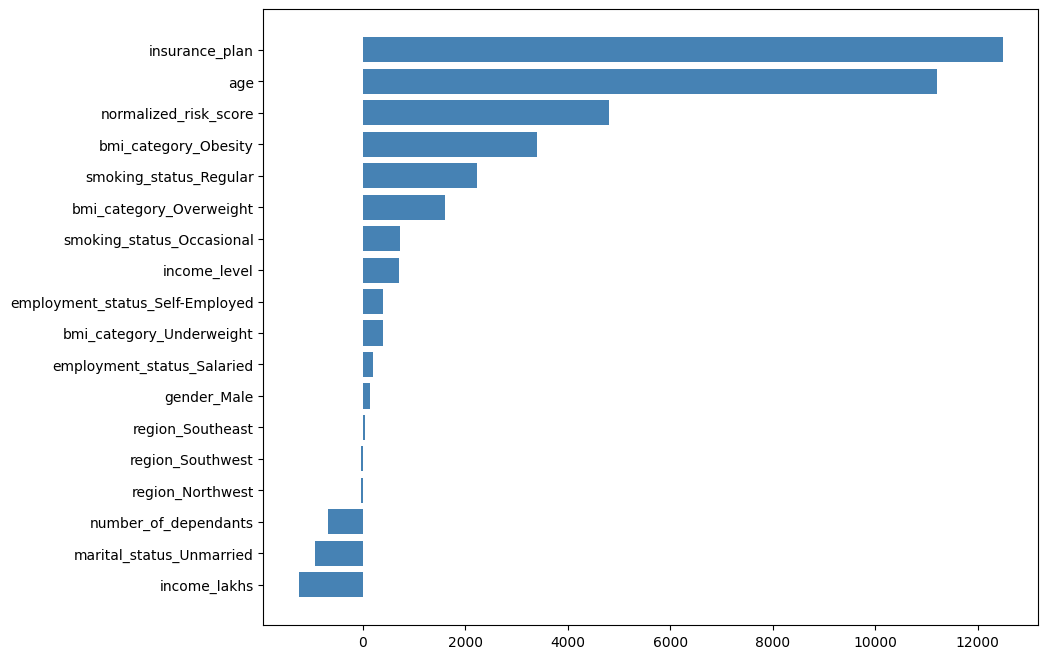

In [170]:
plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df.coeff, color='steelblue')
plt.show()

In [160]:
from xgboost import XGBRegressor

model_xg = XGBRegressor()
model_xg.fit(X_train, y_train)

train_score = model_xg.score(X_train, y_train)
teat_score = model_xg.score(X_test, y_test)

train_score, teat_score


(0.9862935543060303, 0.980892539024353)

RandamSearch cross Validation

In [173]:
param_grid = {
    'n_estimator' : [20, 40, 50],
    'learning_rate': [0.01, 0.01, 0.2],
    'max_depth' : [3, 4, 5]
}

random_search = RandomizedSearchCV(model_xg, param_grid, n_iter=10,  cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
random_search.best_score_

c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\ProgramData\anaconda3\envs\py-latest\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:53:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimato

np.float64(0.981779146194458)

In [175]:
random_search.best_params_

{'n_estimator': 20, 'max_depth': 4, 'learning_rate': 0.2}

In [174]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=20,
             n_estimators=None, n_jobs=None, ...)

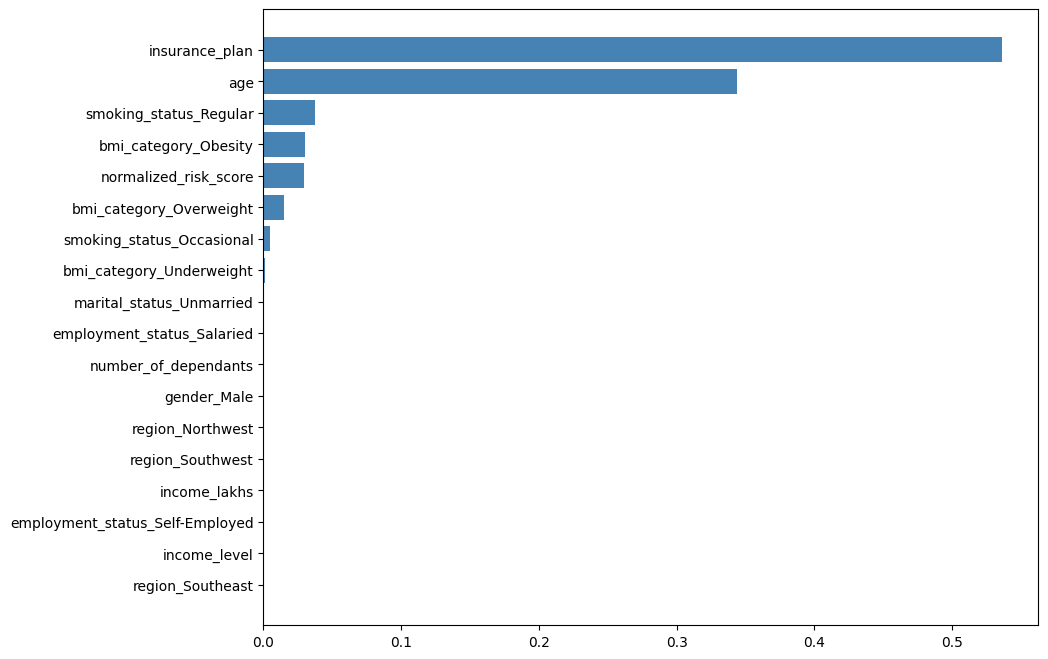

In [176]:
feature_importance = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['coeff'])
coef_df = coef_df.sort_values(by='coeff', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(coef_df.index, coef_df.coeff, color='steelblue')
plt.show()

# Error analysis

In [182]:
y_pred = best_model.predict(X_test)

resd  = y_pred-y_test
resd_per = resd*100/y_test

results_df = pd.DataFrame({
    'acutal': y_test,
    'predicted': y_pred,
    'dif': resd,
    'diff_pct': resd_per

})

results_df.head()


,acutal,predicted,dif,diff_pct
3598,20554,20512.722656,-41.277344,-0.200824
35794,29647,29526.650391,-120.349609,-0.405942
43608,20560,20417.576172,-142.423828,-0.692723
42730,5018,6962.426758,1944.426758,38.749039
18936,8929,8042.914062,-886.085938,-9.923686


<Axes: xlabel='diff_pct', ylabel='Count'>

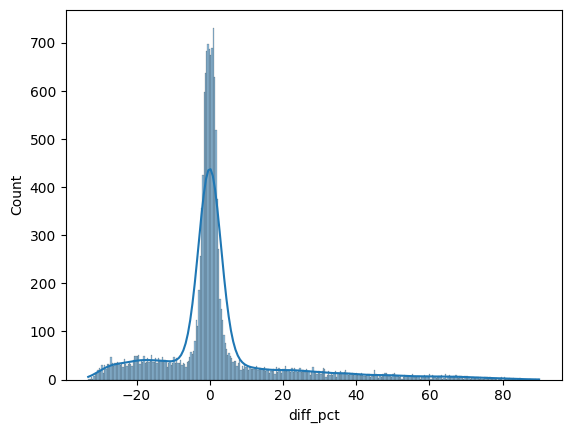

In [184]:
sns.histplot(results_df.diff_pct, kde=True)

In [193]:
error_threshold = 10

error_pred = results_df[abs(results_df.diff_pct)>error_threshold]
error_pred.shape

(4373, 4)

In [194]:
error_pred.shape[0]*100/results_df.shape[0]

29.205903960462166

In [202]:
results_df[abs(results_df.diff_pct)>50].sort_values(by='diff_pct', ascending=False)


,acutal,predicted,dif,diff_pct
36269,3501,6651.291504,3150.291504,89.982619
220,3673,6949.986816,3276.986816,89.218263
22007,3627,6803.297852,3176.297852,87.573693
48801,3516,6582.312012,3066.312012,87.210239
1527,3655,6801.343262,3146.343262,86.083263
...,...,...,...,...
16908,4699,7056.684082,2357.684082,50.174166
19749,4812,7220.916992,2408.916992,50.060619
49595,4379,6570.477051,2191.477051,50.045148
10335,4536,6805.698242,2269.698242,50.037439


In [208]:
error_df = X_test.loc[error_pred.index]
error_df

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.333333,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.000000,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.000000,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.333333,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.000000,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,0.018519,0.2,0.000000,0.070707,0.0,0.000000,0,0,1,0,1,0,0,0,0,0,0,0
25179,0.129630,0.0,0.333333,0.111111,0.0,0.000000,1,0,0,0,1,0,0,0,0,1,0,0
21592,0.055556,0.0,0.000000,0.060606,0.5,0.000000,1,0,0,0,1,0,0,0,0,1,0,0
49274,0.055556,0.2,0.000000,0.070707,0.0,0.000000,0,0,0,0,1,0,0,0,1,0,0,0


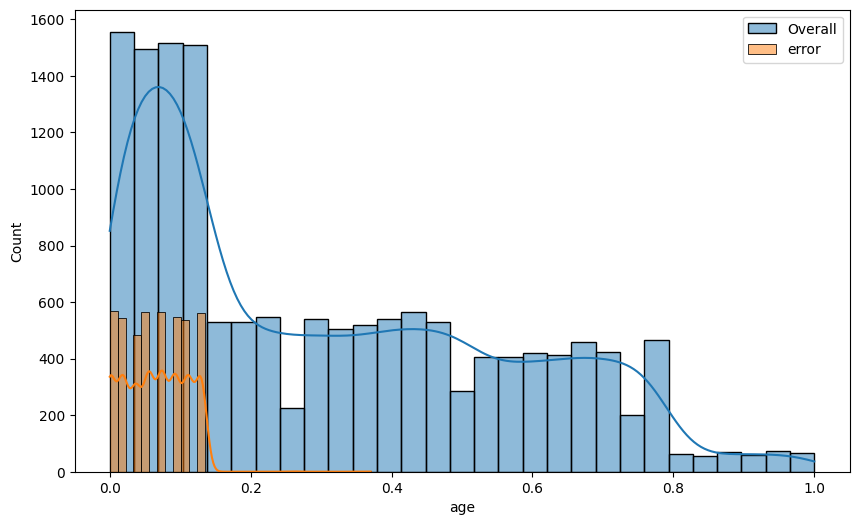

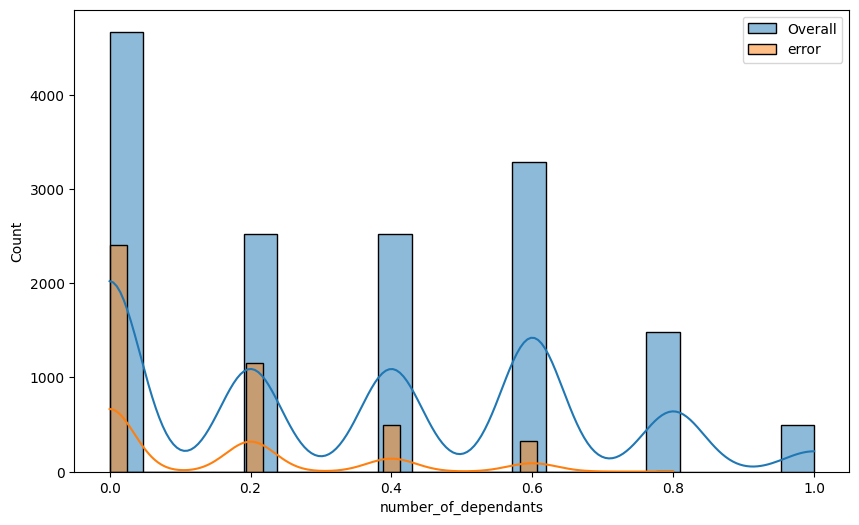

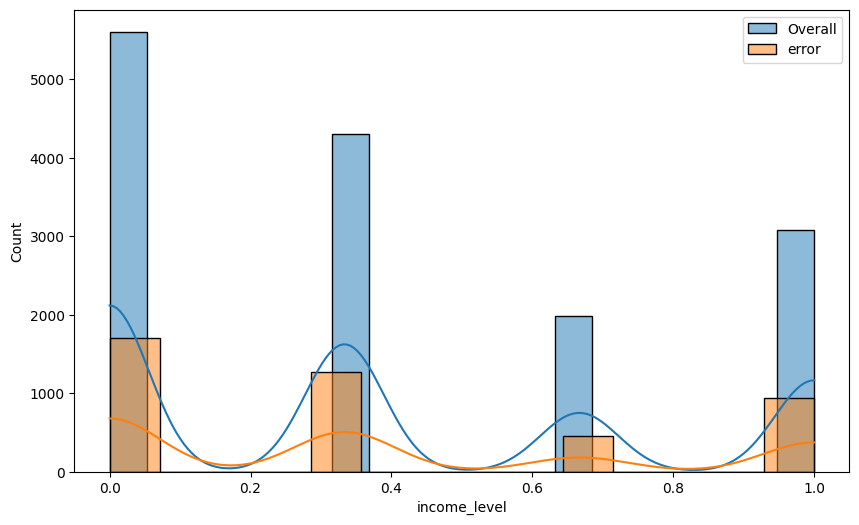

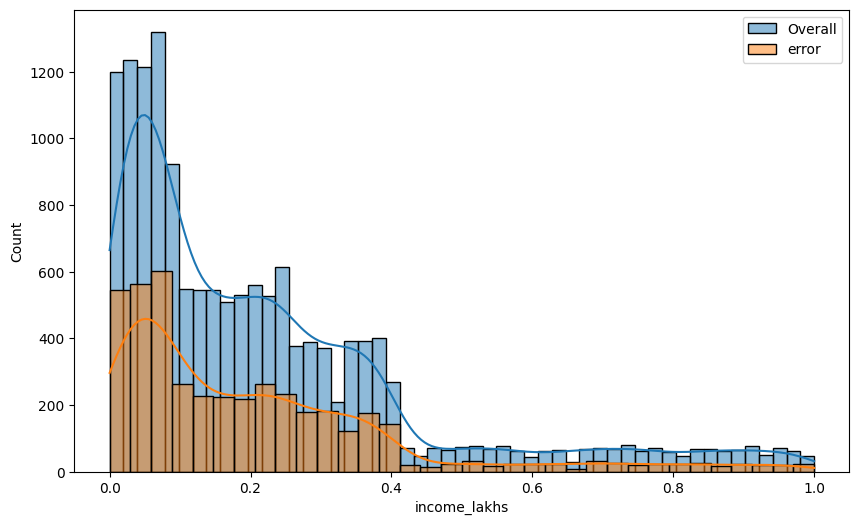

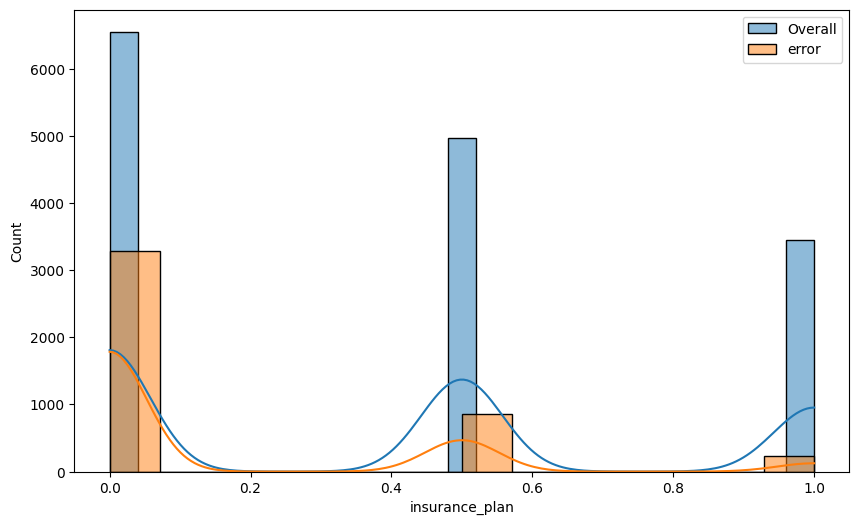

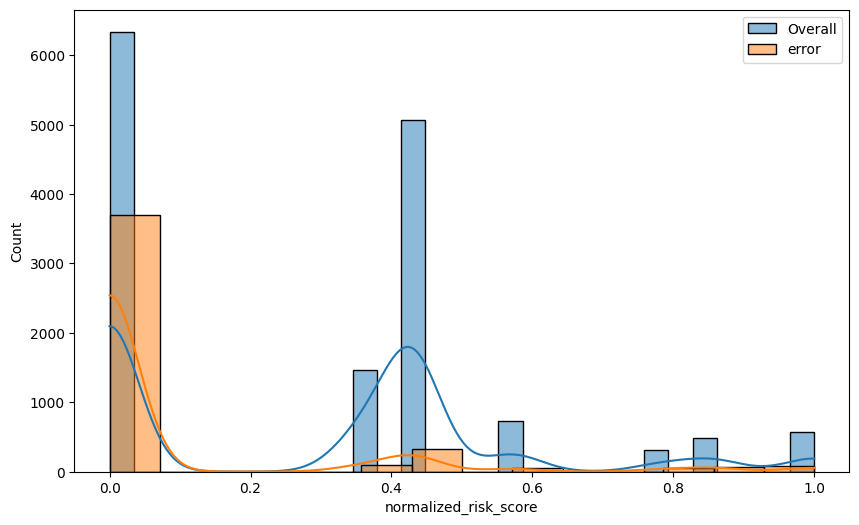

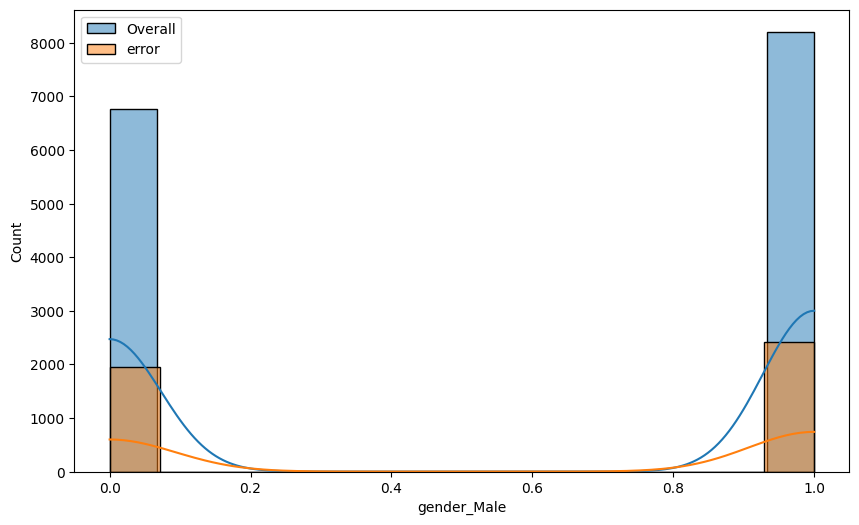

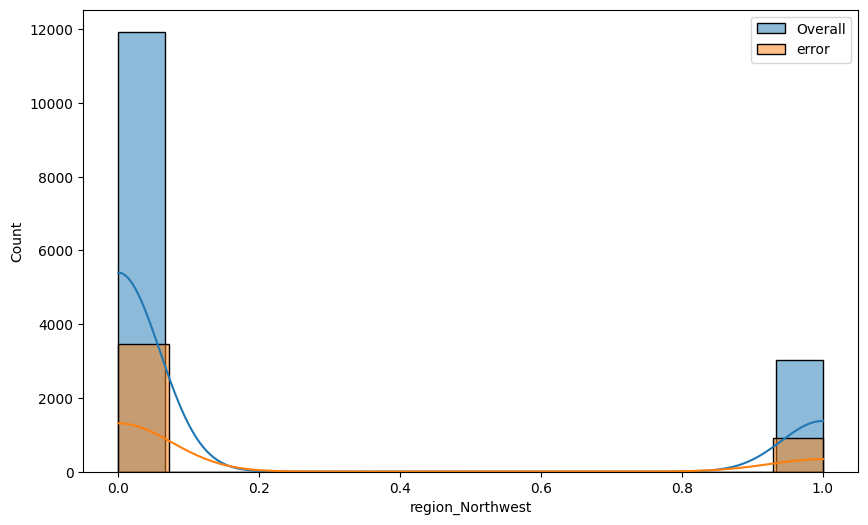

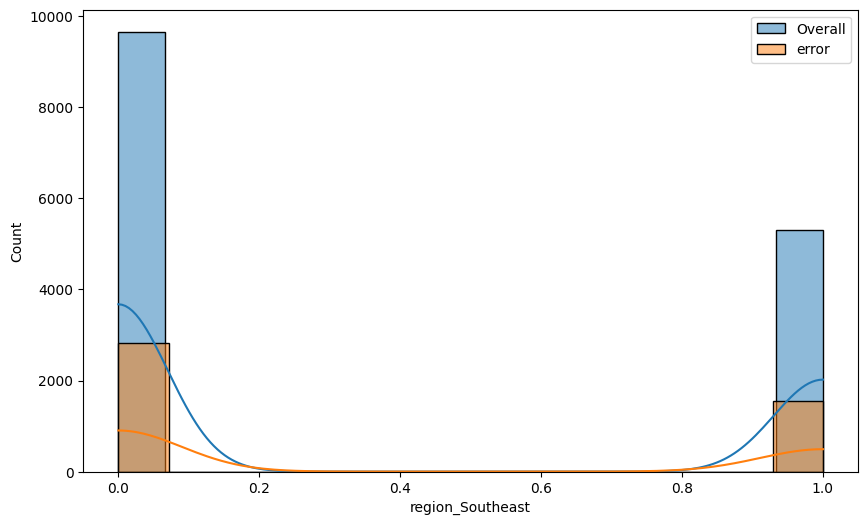

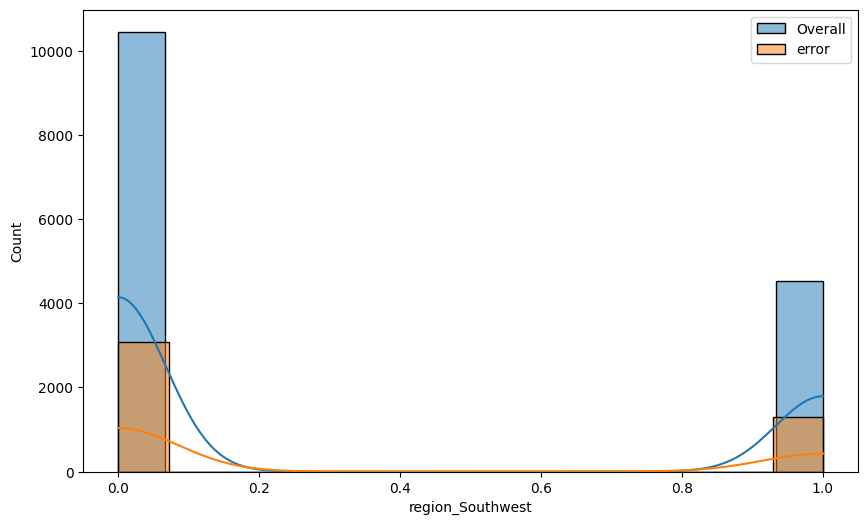

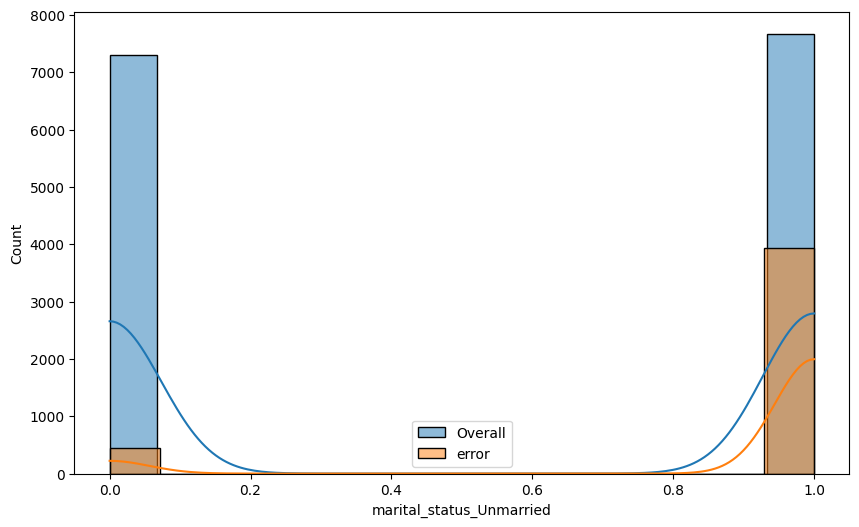

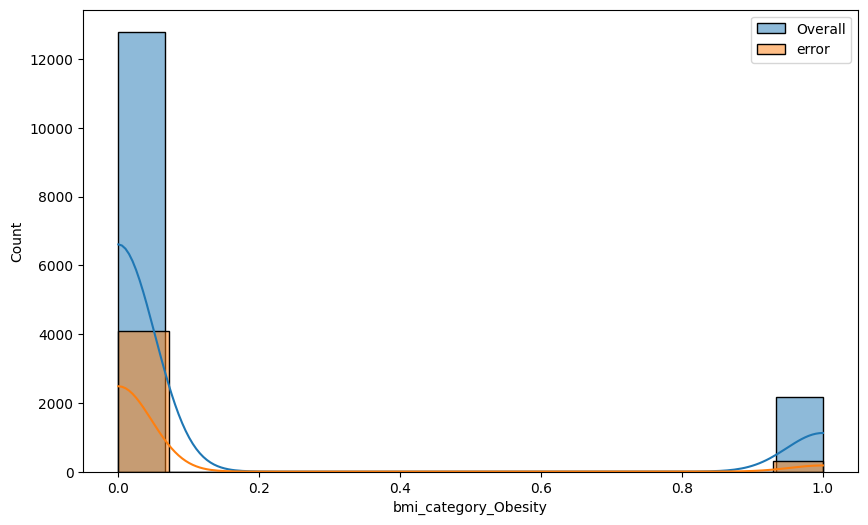

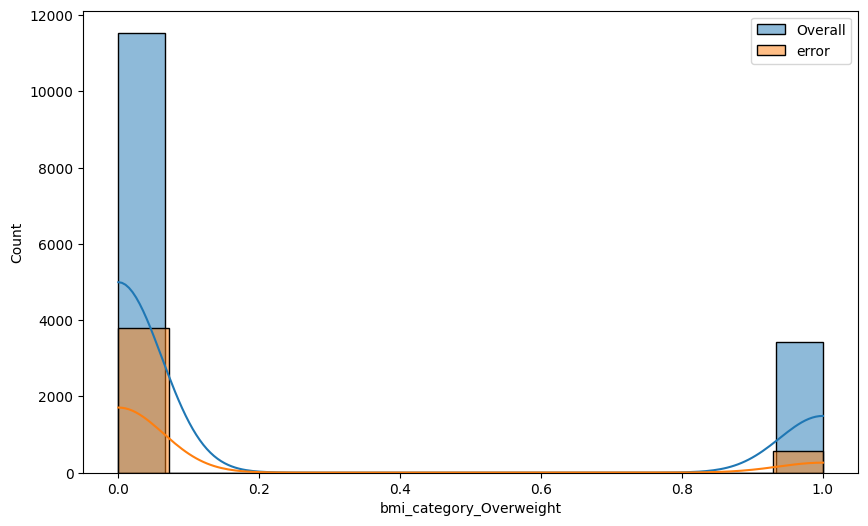

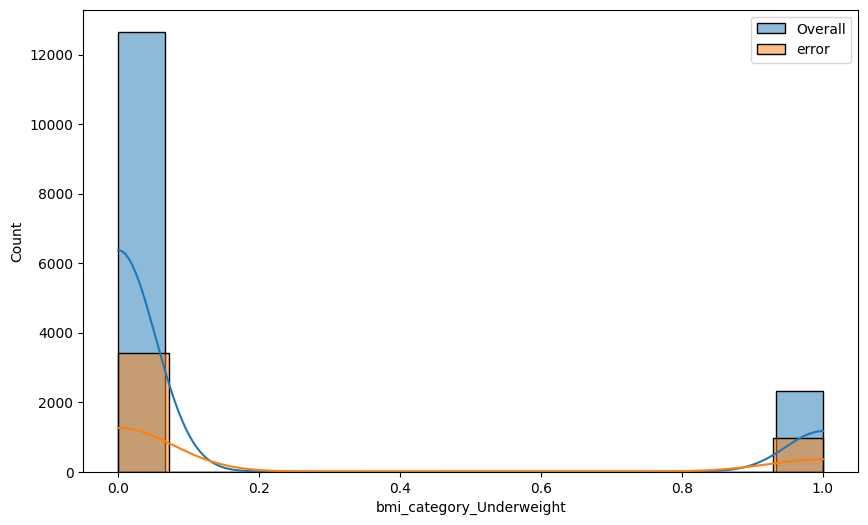

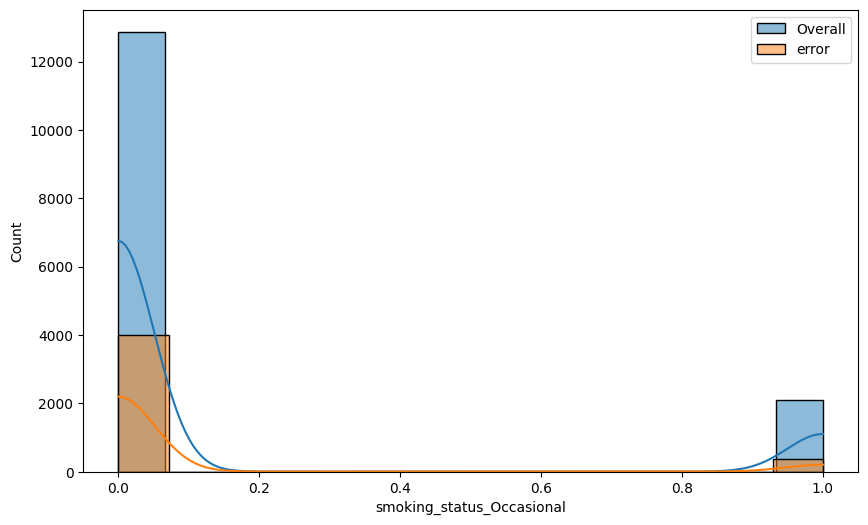

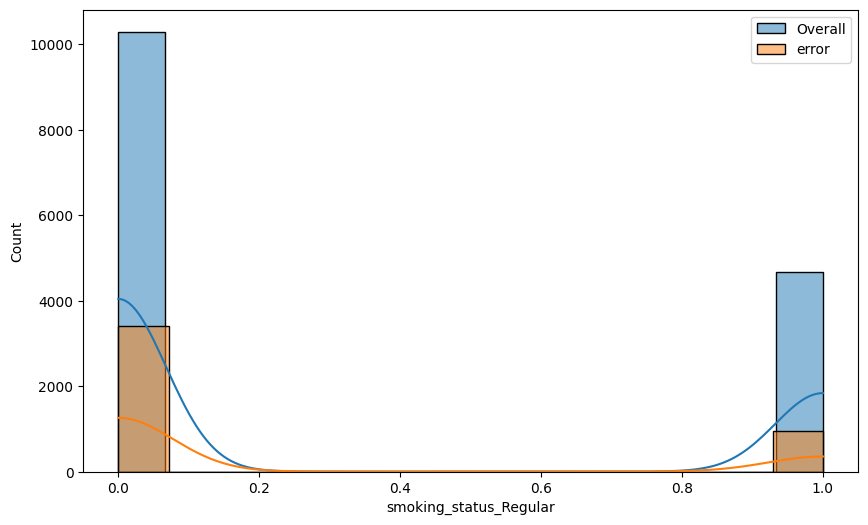

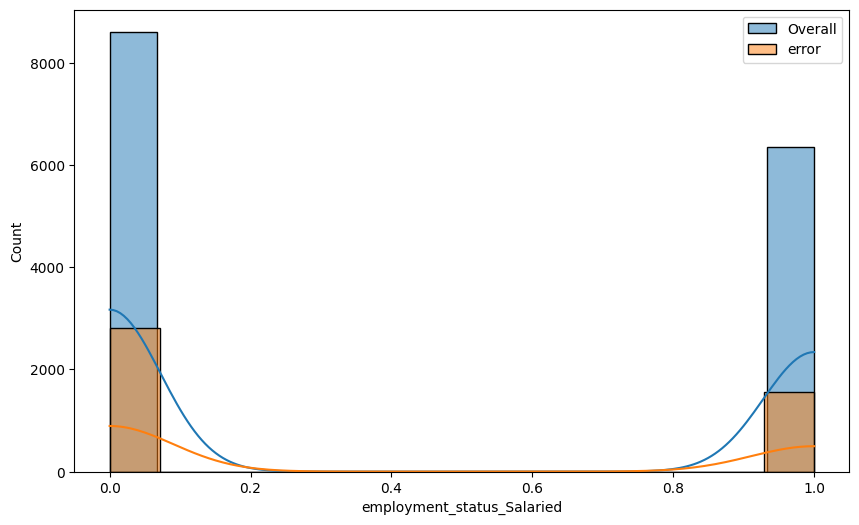

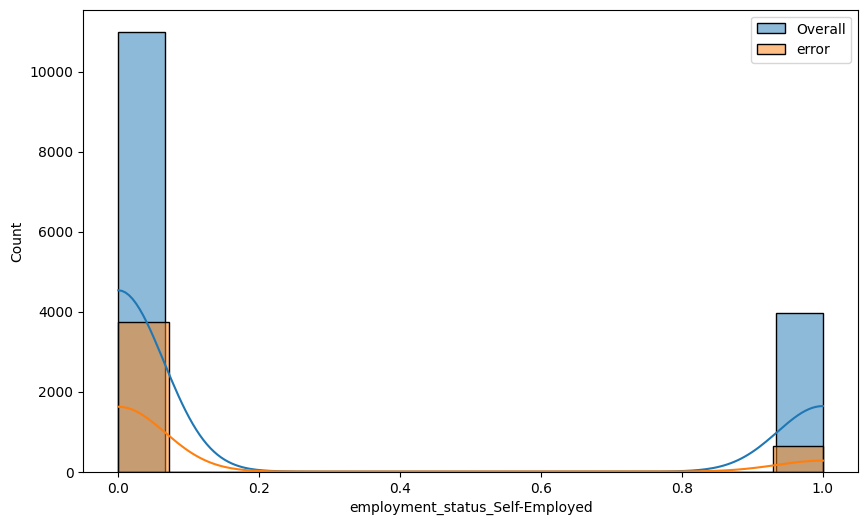

In [207]:
for col in X_test.columns:
    plt.figure(figsize=(14, 6))
    sns.histplot(X_test[col], kde=True, label='Overall')
    sns.histplot(error_df[col], kde=True, label='error')
    plt.legend()
    plt.show()

we can observe some insighs in age Distribution

In [217]:

df_unscale = pd.DataFrame()

df_unscale[col_scale] = scaler.inverse_transform(error_df[col_scale])
df_unscale

,age,number_of_dependants,income_lakhs,income_level,insurance_plan
0,23.0,1.0,14.0,2.0,1.0
1,19.0,1.0,4.0,1.0,1.0
2,18.0,1.0,3.0,1.0,1.0
3,21.0,0.0,25.0,2.0,1.0
4,24.0,1.0,8.0,1.0,2.0
...,...,...,...,...,...
4368,19.0,1.0,8.0,1.0,1.0
4369,25.0,0.0,12.0,2.0,1.0
4370,21.0,0.0,7.0,1.0,2.0
4371,21.0,1.0,8.0,1.0,1.0


<Axes: xlabel='age', ylabel='Count'>

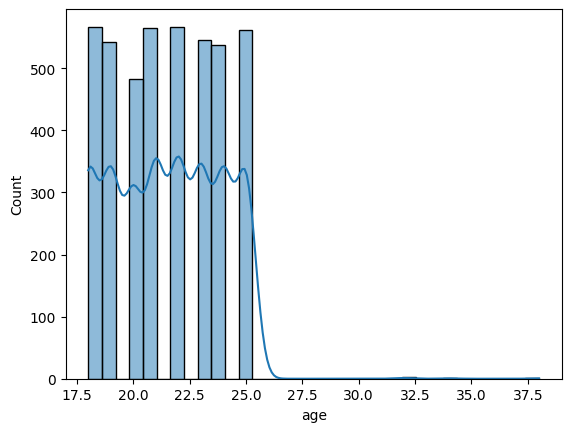

In [218]:
sns.histplot(df_unscale.age, kde=True)

In [223]:
df_unscale.age.quantile(0.999)

np.float64(25.0)